In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
HouseDF = pd.read_csv('data.csv')

In [3]:
HouseDF.head()

,Crime rate,Residential land,Non-retail business,Charless River,Nitric oxide conc,Rooms per dwelling,Age,distances to employment center,Radial highway,tax rate,teacher ratio,blacks by town,status of population,owner occupied homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crime rate                      506 non-null    float64
 1   Residential land                506 non-null    float64
 2   Non-retail business             506 non-null    float64
 3   Charless River                  506 non-null    int64  
 4   Nitric oxide conc               506 non-null    float64
 5   Rooms per dwelling              501 non-null    float64
 6   Age                             506 non-null    float64
 7   distances to employment center  506 non-null    float64
 8   Radial highway                  506 non-null    int64  
 9   tax rate                        506 non-null    int64  
 10  teacher ratio                   506 non-null    float64
 11  blacks by town                  506 non-null    float64
 12  status of population            506 

In [5]:
HouseDF.describe()

,Crime rate,Residential land,Non-retail business,Charless River,Nitric oxide conc,Rooms per dwelling,Age,distances to employment center,Radial highway,tax rate,teacher ratio,blacks by town,status of population,owner occupied homes
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287138,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704401,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
HouseDF.columns

Index(['Crime rate', 'Residential land', 'Non-retail business',
       'Charless River', 'Nitric oxide conc', 'Rooms per dwelling', 'Age',
       'distances to employment center', 'Radial highway', 'tax rate',
       'teacher ratio', 'blacks by town', 'status of population',
       'owner occupied homes'],
      dtype='object')

In [7]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

array([[<Axes: title={'center': 'Crime rate'}>,
        <Axes: title={'center': 'Residential land'}>,
        <Axes: title={'center': 'Non-retail business'}>,
        <Axes: title={'center': 'Charless River'}>],
       [<Axes: title={'center': 'Nitric oxide conc'}>,
        <Axes: title={'center': 'Rooms per dwelling'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'distances to employment center'}>],
       [<Axes: title={'center': 'Radial highway'}>,
        <Axes: title={'center': 'tax rate'}>,
        <Axes: title={'center': 'teacher ratio'}>,
        <Axes: title={'center': 'blacks by town'}>],
       [<Axes: title={'center': 'status of population'}>,
        <Axes: title={'center': 'owner occupied homes'}>, <Axes: >,
        <Axes: >]], dtype=object)

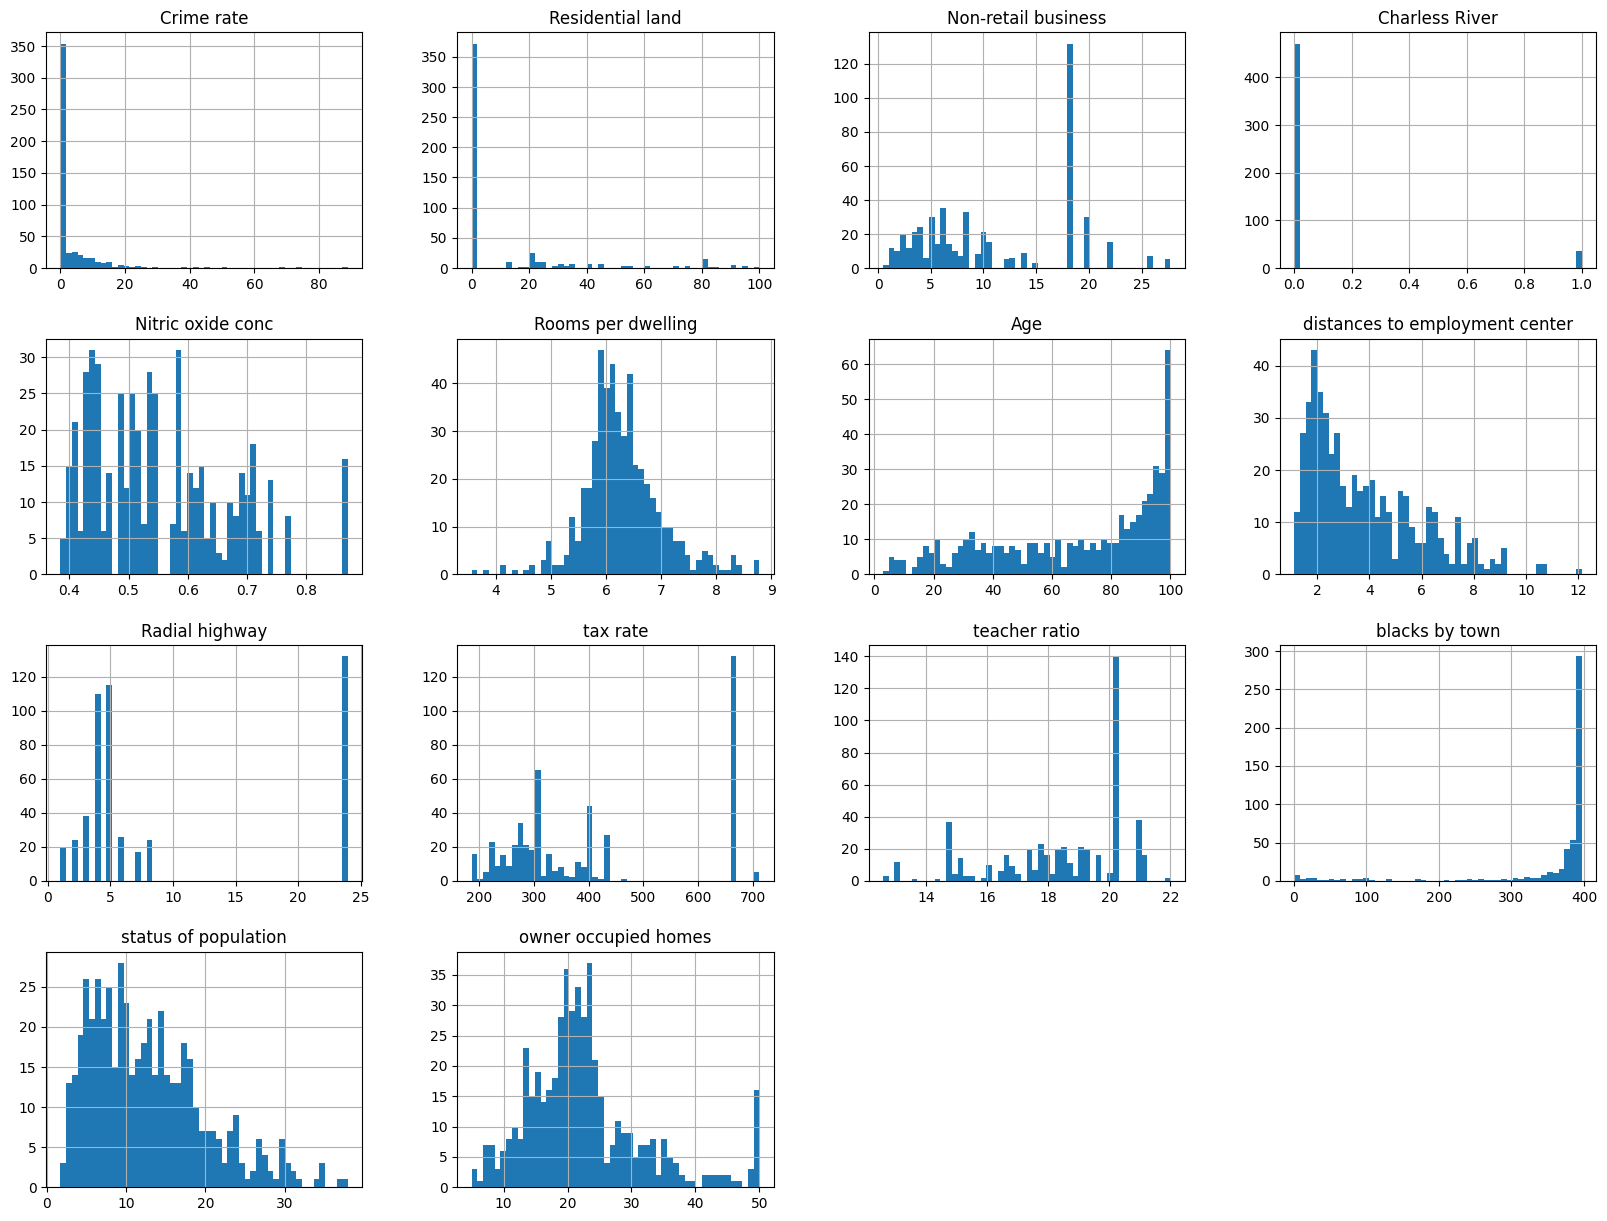

In [8]:
HouseDF.hist(bins=50,figsize=(20,15))

##  Train-Test Splitting

In [9]:

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [10]:
#train_set, test_set = split_train_test(HouseDF,0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(HouseDF,test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set: 404
Rows in test set:102



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(HouseDF, HouseDF['Charless River']):
    strat_train_set = HouseDF.loc[train_index]
    strat_test_set = HouseDF.loc[test_index]
    

In [14]:
strat_test_set['Charless River'].value_counts()

Charless River
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['Charless River'].value_counts()

Charless River
0    376
1     28
Name: count, dtype: int64

In [16]:
HouseDF = strat_train_set.copy()

In [17]:
corr_matrix = HouseDF.corr()

## Looking for Correlations 

array([[<Axes: xlabel='Rooms per dwelling', ylabel='Rooms per dwelling'>,
        <Axes: xlabel='Residential land', ylabel='Rooms per dwelling'>,
        <Axes: xlabel='owner occupied homes', ylabel='Rooms per dwelling'>,
        <Axes: xlabel='status of population', ylabel='Rooms per dwelling'>],
       [<Axes: xlabel='Rooms per dwelling', ylabel='Residential land'>,
        <Axes: xlabel='Residential land', ylabel='Residential land'>,
        <Axes: xlabel='owner occupied homes', ylabel='Residential land'>,
        <Axes: xlabel='status of population', ylabel='Residential land'>],
       [<Axes: xlabel='Rooms per dwelling', ylabel='owner occupied homes'>,
        <Axes: xlabel='Residential land', ylabel='owner occupied homes'>,
        <Axes: xlabel='owner occupied homes', ylabel='owner occupied homes'>,
        <Axes: xlabel='status of population', ylabel='owner occupied homes'>],
       [<Axes: xlabel='Rooms per dwelling', ylabel='status of population'>,
        <Axes: xlabel='Resi

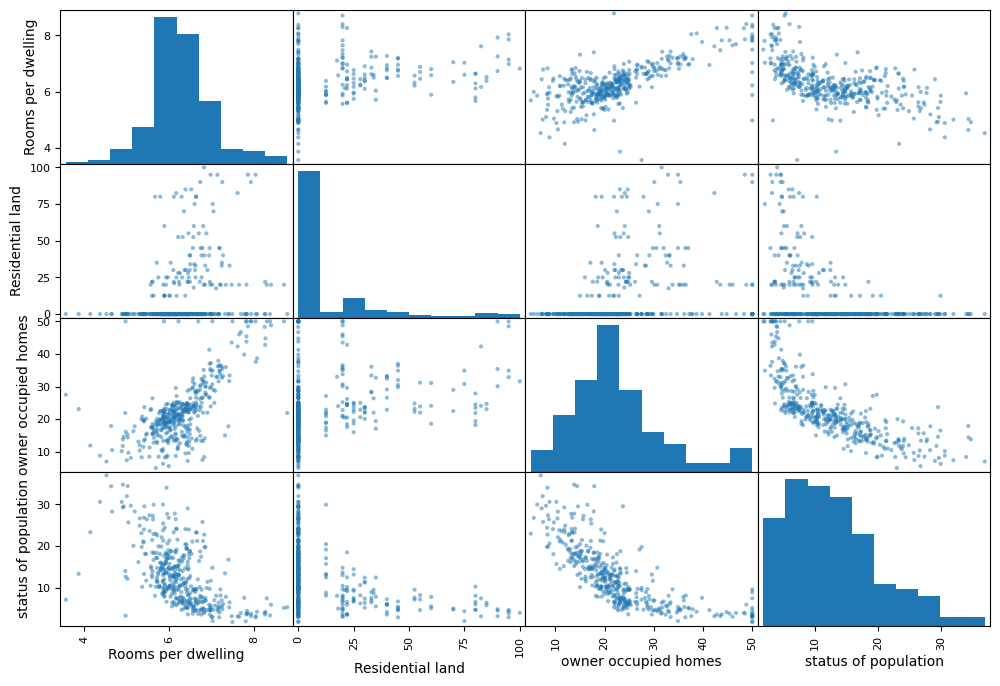

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["Rooms per dwelling","Residential land","owner occupied homes","status of population"]
scatter_matrix(HouseDF[attributes], figsize = (12,8))

In [19]:
corr_matrix['owner occupied homes'].sort_values(ascending=False)

owner occupied homes              1.000000
Rooms per dwelling                0.678818
blacks by town                    0.361761
Residential land                  0.339741
distances to employment center    0.240451
Charless River                    0.205066
Age                              -0.364596
Radial highway                   -0.374693
Crime rate                       -0.393715
Nitric oxide conc                -0.422873
tax rate                         -0.456657
Non-retail business              -0.473516
teacher ratio                    -0.493534
status of population             -0.740494
Name: owner occupied homes, dtype: float64

<Axes: xlabel='Rooms per dwelling', ylabel='owner occupied homes'>

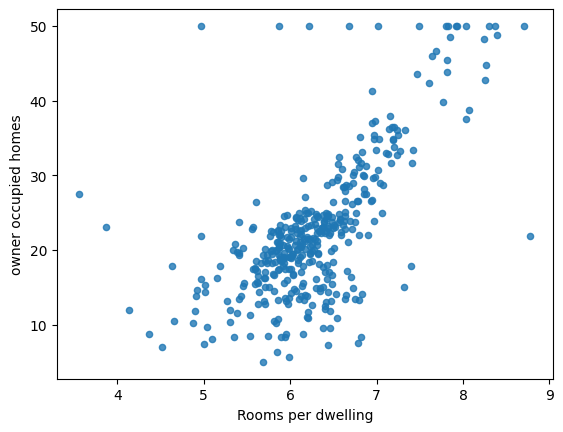

In [20]:
HouseDF.plot(kind="scatter",x="Rooms per dwelling",y="owner occupied homes",alpha=0.8)

## Trying out attribute combinations

In [21]:
HouseDF["TAXRM"] = HouseDF['tax rate']/HouseDF['Rooms per dwelling']

In [22]:
HouseDF.head()

,Crime rate,Residential land,Non-retail business,Charless River,Nitric oxide conc,Rooms per dwelling,Age,distances to employment center,Radial highway,tax rate,teacher ratio,blacks by town,status of population,owner occupied homes,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = HouseDF.corr()
corr_matrix['owner occupied homes'].sort_values(ascending=False)

owner occupied homes              1.000000
Rooms per dwelling                0.678818
blacks by town                    0.361761
Residential land                  0.339741
distances to employment center    0.240451
Charless River                    0.205066
Age                              -0.364596
Radial highway                   -0.374693
Crime rate                       -0.393715
Nitric oxide conc                -0.422873
tax rate                         -0.456657
Non-retail business              -0.473516
teacher ratio                    -0.493534
TAXRM                            -0.527363
status of population             -0.740494
Name: owner occupied homes, dtype: float64

In [24]:
HouseDF = strat_train_set.drop("owner occupied homes",axis=1)
HouseDF_labels = strat_train_set["owner occupied homes"].copy()

## Missing attributes

In [25]:
a = HouseDF.dropna(subset=["Rooms per dwelling"]) #option 1
a.shape

(400, 13)

In [26]:
HouseDF.drop("Rooms per dwelling",axis=1).shape#option 2 there is no RM colums

(404, 12)

In [27]:
median = HouseDF["Rooms per dwelling"].median()

In [28]:
HouseDF["Rooms per dwelling"].fillna(median)#option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: Rooms per dwelling, Length: 404, dtype: float64

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(HouseDF)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
X = imputer.transform(HouseDF)

In [32]:
HouseDF_tr = pd.DataFrame(X, columns=HouseDF.columns)

In [33]:
HouseDF_tr.describe()

,Crime rate,Residential land,Non-retail business,Charless River,Nitric oxide conc,Rooms per dwelling,Age,distances to employment center,Radial highway,tax rate,teacher ratio,blacks by town,status of population
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280584,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711729,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

## Feature scaling

## Creating pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])


In [35]:
HouseDF_num_tr = my_pipeline.fit_transform(HouseDF)

In [36]:
HouseDF_num_tr.shape

(404, 13)

## Selecting desired model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(HouseDF_num_tr,HouseDF_labels)

RandomForestRegressor()

In [38]:
some_data = HouseDF.iloc[:5]

In [39]:
some_labels = HouseDF_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.478, 25.712, 16.462, 23.192, 23.461])

In [42]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
HouseDF_predictions = model.predict(HouseDF_num_tr)
mse = mean_squared_error(HouseDF_labels,HouseDF_predictions)
rmse = np.sqrt(mse)

In [44]:
rmse

1.225006869045198

## Using better evaluation technique- Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,HouseDF_num_tr,HouseDF_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([2.91968354, 2.71340346, 4.47193625, 2.60654506, 3.37895102,
       2.64268574, 4.53367087, 3.38732997, 3.3693105 , 3.42650741])

In [47]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())
    

In [48]:
print_scores(rmse_scores)

Scores: [2.91968354 2.71340346 4.47193625 2.60654506 3.37895102 2.64268574
 4.53367087 3.38732997 3.3693105  3.42650741]
Mean:  3.34500238136337
Standard deviation:  0.6566180020564444


## Saving the model

In [49]:
from joblib import dump, load
dump(model,'Housepricing.joblib')

['Housepricing.joblib']

## Testing the model on test data

In [53]:
X_test = strat_test_set.drop("owner occupied homes",axis=1)
Y_test = strat_test_set["owner occupied homes"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(Y_test))

In [51]:
final_rmse

2.9698537925324877

In [55]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24278628, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [56]:
from joblib import dump, load
import numpy as np
model = load('Housepricing.joblib')
features = np.array([[-0.43942006,  9.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24278628, -1.31238772,  2.61111401, -9.0016859 , -0.5778192 ,
       -0.97491834,  10.41164221, -0.86091034]])
model.predict(features)

array([22.614])